# Multi-fidelity optimization

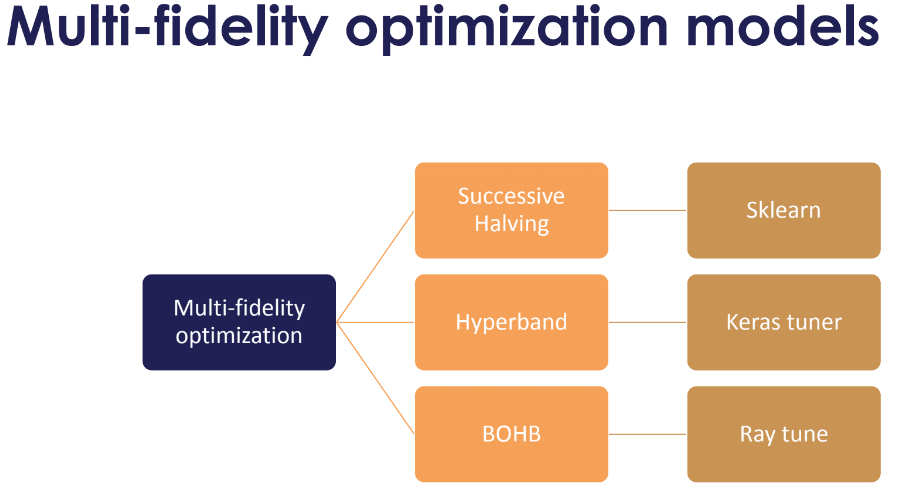

**Multi-fidelity optimization** is a technique used to find the best solution in a way that balances the accuracy of results with the cost of obtaining those results.

**In Simple Terms:**
* Multiple Levels of Accuracy: Imagine you have different ways to test something: one way is very accurate but takes a long time (high fidelity), and another way is quicker but not as precise (low fidelity). Multi-fidelity optimization uses both methods to find the best answer.

* Smart Sampling: Instead of only using the slow and accurate method, it combines results from both methods. It starts with the quick, less accurate method to explore options and find promising areas. Then, it uses the slow, accurate method to refine the results only in those promising areas.

* Efficiency: This approach saves time and resources by leveraging the strengths of both methods, allowing for faster and more effective optimization.

**Example**:
If you were tuning a robot's movement, you could quickly simulate its movements (low fidelity) to get a rough idea of what settings might work, and then use the actual robot (high fidelity) to test those settings more accurately. This way, you get the benefits of both speed and precision!

# Successive Halving

Successive Halving is a hyperparameter optimization technique designed to efficiently allocate computational resources—such as time or processing power—by iteratively refining a set of configurations. This method is particularly useful in scenarios where evaluating a model can be resource-intensive.

How It Works: The process begins with a large pool of configurations (different sets of hyperparameters). Initially, all configurations are evaluated using a limited budget, such as running each configuration for just a few training epochs. After this first round of evaluations, only the top-performing configurations (e.g., those that achieve the best accuracy or lowest loss) are retained for further testing, while the others are discarded. In subsequent rounds, the remaining configurations receive more resources (e.g., more training epochs) for a more thorough evaluation, progressively narrowing down to the best-performing ones.

Example: Imagine you have 16 different models with unique hyperparameter settings. In the first round, you run each of these models for 1 epoch. After assessing their performance, you keep the top 8 models based on their results. In the next round, those top 8 models are evaluated for 2 epochs. This process continues, where you retain the top performers after each round, until you arrive at the best model through progressively increasing evaluation efforts.

**Sklearn has 2 classes for successive halving:**

* HalvingRandomSearchCV
* HalvingGridSearchCV

The difference is how they create the hyperparameter combinations that will be tested. The first samples hyperparameters at random from provided distributions. The second creates the hyperparameter combinations based on the provided grid.

# Hyperband

Hyperband is an advanced version of Successive Halving that enhances the efficiency of hyperparameter optimization by combining random search with adaptive resource allocation.

How It Works: Like Successive Halving, Hyperband starts with a wide range of random configurations. However, it uses a more dynamic approach to resource allocation. Instead of strictly halving the number of configurations after each round, Hyperband intelligently allocates more trials to configurations that show promise based on their performance in previous evaluations. This allows it to quickly focus on the most promising hyperparameter settings while still exploring a broad range of options.

Example: Suppose you randomly sample 32 different model configurations. After the initial evaluation, instead of simply halving to 16 models, Hyperband may assign more resources to configurations that performed well and less to those that did not. This means that some configurations could receive a larger share of the budget to be tested more extensively, while others might be cut earlier in the process.

# BOHB (Bayesian Optimization with Hyperband)


BOHB merges the concepts of Bayesian Optimization (BO) and Hyperband to create a powerful hyperparameter tuning framework.

How It Works: BOHB employs Bayesian optimization to model the performance of different hyperparameter configurations. This modeling enables informed decisions about which configurations to test next, aiming to explore the hyperparameter space intelligently. Simultaneously, it integrates the resource allocation strategy of Hyperband, allowing for quick identification and refinement of the best hyperparameters. By combining these two approaches, BOHB achieves an efficient balance between exploration (trying out various configurations) and exploitation (focusing on the best ones).

Example: BOHB may begin by exploring a wide range of hyperparameters using Bayesian methods to understand which configurations have the potential for good performance. After identifying promising configurations, it applies Hyperband to allocate resources efficiently, conducting extensive evaluations of those promising models while discarding poorer performers early on.

**Comparison**

* Successive Halving: Discards poor performers in rounds, progressively allocating more resources to the best configurations. It helps optimize hyperparameters by focusing efforts where they matter most.
* Hyperband: An advanced method that combines random sampling with dynamic resource allocation, allowing it to intelligently distribute computational resources to the most promising configurations while still exploring new options.
* BOHB: Integrates Bayesian optimization and Hyperband for a highly effective hyperparameter tuning approach. It leverages the strengths of both techniques to efficiently balance exploration and exploitation.

# ASHA

ASHA (Adaptive SucceSSive Halving Algorithm) is an advanced hyperparameter optimization technique that builds upon the principles of Successive Halving while incorporating adaptive resource allocation. Here’s a simplified explanation:

* Key Features of ASHA
Adaptive Resource Allocation: ASHA adjusts the amount of computational resources allocated to different configurations based on their performance. This means that it can allocate more trials to promising configurations and cut those that are underperforming more quickly.

* Multi-Fidelity Approach: Like Successive Halving, ASHA evaluates a large number of configurations with limited resources in the initial stages. It gradually increases the resource allocation to the best-performing configurations over multiple iterations.

* Parallel Execution: ASHA can run multiple configurations simultaneously, making it efficient in terms of time and computational resources. This parallelism allows it to evaluate many configurations at once, speeding up the optimization process.

* How ASHA Works
Initial Evaluation: Start with a broad set of random hyperparameter configurations and evaluate them with limited resources (e.g., a small number of training epochs).

* Performance Assessment: After the initial round, assess the performance of all configurations and keep only the top performers.

* Adaptive Halving: Instead of strictly halving the configurations, ASHA dynamically adjusts the number of trials based on performance metrics, allowing it to allocate more resources to configurations that show promise.

* Iteration: This process repeats, gradually increasing the resource allocation for the best-performing configurations while discarding less promising ones until the optimal hyperparameters are identified.

**Example**

* Initial Set of Configurations: You start with 64 different hyperparameter configurations.

* First Round Evaluation: All 64 configurations are evaluated over a limited resource budget (e.g., a few training epochs).

* Performance Assessment: After the initial evaluation, you assess their performance and keep the top 32 configurations.

* Adaptive Halving: Instead of simply halving the configurations again, ASHA evaluates which of the 32 performed best. It allocates more resources (like more epochs) to those top performers while quickly cutting out the underperforming configurations.


Summary
ASHA is a powerful optimization technique that combines the efficiency of Successive Halving with adaptive resource allocation and parallel execution, making it suitable for optimizing hyperparameters in machine learning tasks efficiently.

## Algorithms Behaviour:
* **Successive Halving**: Actively discards a portion of the configurations after each round of evaluations, focusing resources on the best performers.
* **Hyperband**: Similar to Successive Halving, Hyperband cuts poor-performing configurations but does so more dynamically, allocating resources based on performance instead of a strict halving rule.
* **BOHB** (Bayesian Optimization with Hyperband): Combines the cutting approach of Hyperband with Bayesian optimization, eliminating less promising configurations while refining the search.

* **ASHA** (Asynchronous Successive Halving Algorithm): Although it incorporates a cutting mechanism similar to Successive Halving, it operates asynchronously, allowing multiple configurations to be evaluated at once. It discards poor performers based on performance evaluations but does so in a more flexible manner compared to strict halving.

* **Bayesian Optimization** (BO): While it evaluates multiple configurations, it does not inherently cut configurations like Successive Halving or Hyperband. Instead, it focuses on exploring the hyperparameter space based on probabilistic models, allowing for continuous evaluation without immediate elimination.

In practice, even the non-cutting algorithms may lead to the disregarding of poor configurations over multiple iterations based on performance trends, but they don't formally eliminate them in the same way that cutting algorithms do.

## Parallel Algorithms:

**Parallel Algorithms**
Hyperband: This algorithm can run multiple configurations simultaneously, making it efficient in terms of time and resources. It evaluates different configurations in parallel during its rounds of evaluation.

BOHB (Bayesian Optimization with Hyperband): This method also utilizes parallel execution by combining Bayesian optimization with Hyperband. It can evaluate multiple configurations at once while balancing exploration and exploitation.

ASHA (Adaptive Successive Halving Algorithm): ASHA is designed for parallel execution. It can run several configurations simultaneously and adaptively allocate resources to promising configurations during the optimization process.

**Non-Parallel Algorithms**:
Successive Halving: While it can be implemented in a parallel manner, traditional Successive Halving itself evaluates configurations in a sequential manner, focusing on one round at a time before moving to the next.

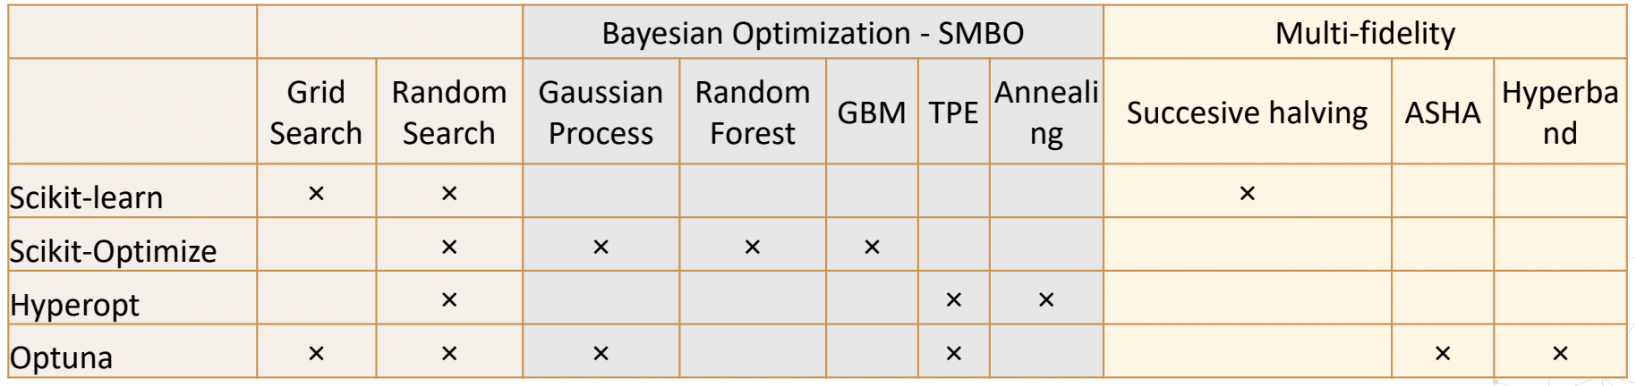

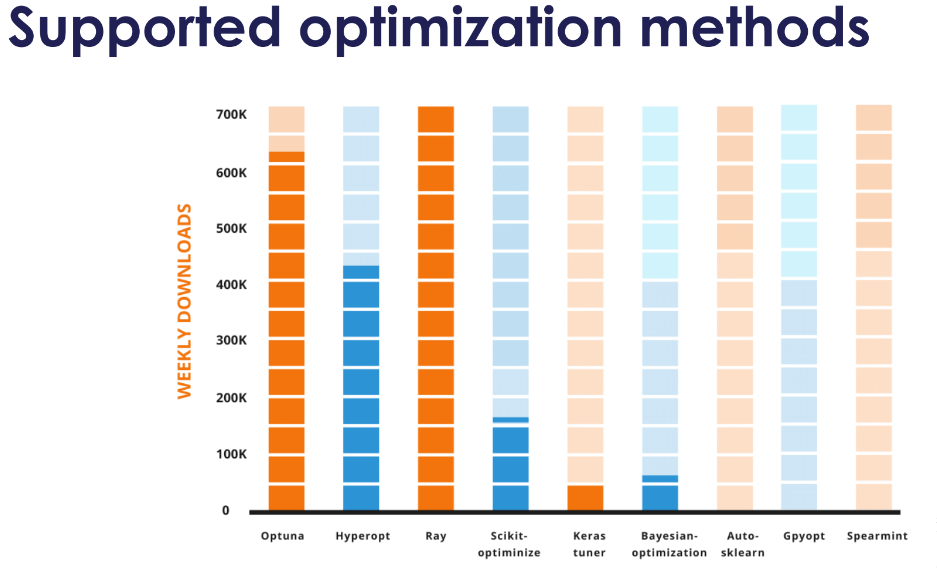